In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arr = np.array([[0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,1,1,1,1,1,1,1,0,0],
                [0,0,0,0,1,1,1,1,0,0],
                [0,0,0,0,1,1,1,1,0,0],
                [0,0,0,1,1,1,1,1,0,0],
                [0,0,0,0,1,1,1,1,0,0],
                [0,0,0,1,1,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0]])

In [4]:
struct = np.ones((3, 3))

In [5]:
def dilation(image, mask = struct):
    
    result = np.zeros_like(image)
    for y in range(1, image.shape[0] - 1):
        for x in range(1, image.shape[1] - 1):
            
            rlog = np.logical_and(arr[y, x], mask)
            result[y-1:y+2, x-1:x+2] = np.logical_or(result[y-1:y+2, x-1:x+2], rlog)
            
    return result

In [6]:
def erosion(image, mask = struct):
        
    result = np.zeros_like(image)
    for y in range(1, image.shape[0] - 1):
        for x in range(1, image.shape[1] - 1):
            
            sub = image[y-1:y+2, x-1:x+2]
            if np.all(sub == mask):
                result[y, x] = 1
            
    return result

In [7]:
def closing(image, mask=struct):
    return erosion(dilation(image, mask), mask)

In [8]:
def opening(image, mask=struct):
    return dilation(erosion(image, mask), mask)

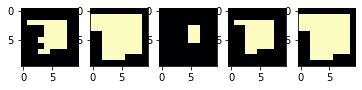

In [9]:
plt.figure()
plt.subplot(151)
plt.imshow(arr, cmap='magma')
plt.subplot(152)
plt.imshow(dilation(arr), cmap='magma')
plt.subplot(153)
plt.imshow(erosion(arr), cmap='magma')
plt.subplot(154)
plt.imshow(closing(arr), cmap='magma')
plt.subplot(155)
plt.imshow(opening(arr), cmap='magma') #не понятно почему не работает как надо